# General EDA using Global Superstore dataset
## Project 1 (Task 2)

### Import libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data loading

In [32]:
file_path = r"D:\Sanjana\Coding practice\Internship_mainflow\superstore.csv" 
df = pd.read_csv(file_path, sep=',') 

In [33]:
# Display the first few rows
print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

### 2. Clean Data

In [34]:
# (a) Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [35]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [36]:
# Fill missing categorical values with a placeholder
df.fillna("Unknown", inplace=True)


In [37]:
# Confirm no missing values remain
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


### (b)Remove duplicates


In [38]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Dataset shape after removing duplicates: (51290, 27)


### (c) Handle outliers (Using IQR Method)


In [39]:
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [40]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Dataset shape after handling outliers:", df.shape)


Dataset shape after handling outliers: (31775, 27)


### 3. Statistical analysis

In [41]:
# (A) Compute Measures of Central Tendency and Dispersion
# Summary statistics for numerical columns
stats = df.describe()
print("Summary Statistics:\n", stats)


Summary Statistics:
            Discount      记录数        Profit      Quantity        Row.ID  \
count  31775.000000  31775.0  31775.000000  31775.000000  31775.000000   
mean       0.093055      1.0     12.351458      2.874713  25014.629237   
std        0.151810      0.0     21.722512      1.612040  14780.744177   
min        0.000000      1.0    -57.402000      1.000000      1.000000   
25%        0.000000      1.0      1.780000      2.000000  12070.500000   
50%        0.000000      1.0      7.680000      3.000000  25077.000000   
75%        0.200000      1.0     19.860000      4.000000  37603.500000   
max        0.500000      1.0    100.788000      7.000000  51290.000000   

              Sales  Shipping.Cost          Year       weeknum  
count  31775.000000   31775.000000  31775.000000  31775.000000  
mean      73.250134       6.640990   2012.777215     31.291833  
std       66.738460       6.048856      1.097528     14.399202  
min        1.000000       0.002000   2011.000000    

#### (A)Measures like mean, median, standard deviation

In [42]:
# Specific measures like mean, median, standard deviation, and variance 
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
median_sales = df['Sales'].median()

print(f"Mean Sales: {mean_sales}, Standard Deviation: {std_sales}, Median: {median_sales}")

Mean Sales: 73.25013375295043, Standard Deviation: 66.73845989087567, Median: 50.0


#### (B) Compute correlations between specific variables

In [43]:
#b. Compute Correlations between specific variables
#1.  Correlation between Discount and Profit
discount_profit_corr = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {discount_profit_corr}")

#2. Correlation between Sales and Profit
sales_profit_corr = df['Sales'].corr(df['Profit'])
print(f"Correlation between Sales and Profit: {sales_profit_corr}")

#3. Correlation between Shipping Cost and Profit
shipping_profit_corr = df['Shipping.Cost'].corr(df['Profit'])
print(f"Correlation between Shipping Cost and Profit: {shipping_profit_corr}")



Correlation between Discount and Profit: -0.4831850503471732
Correlation between Sales and Profit: 0.5015999888779508
Correlation between Shipping Cost and Profit: 0.387148940170444


In [44]:
#Correlation Matrix of Important Variables
important_columns = ['Sales', 'Profit', 'Discount', 'Shipping.Cost', 'Quantity']
correlation_matrix = df[important_columns].corr()

print("Correlation Matrix for Selected Variables:\n", correlation_matrix)

Correlation Matrix for Selected Variables:
                   Sales    Profit  Discount  Shipping.Cost  Quantity
Sales          1.000000  0.501600 -0.082976       0.747016  0.235238
Profit         0.501600  1.000000 -0.483185       0.387149  0.126322
Discount      -0.082976 -0.483185  1.000000      -0.074666  0.073907
Shipping.Cost  0.747016  0.387149 -0.074666       1.000000  0.204338
Quantity       0.235238  0.126322  0.073907       0.204338  1.000000


### Data Visulalization

C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


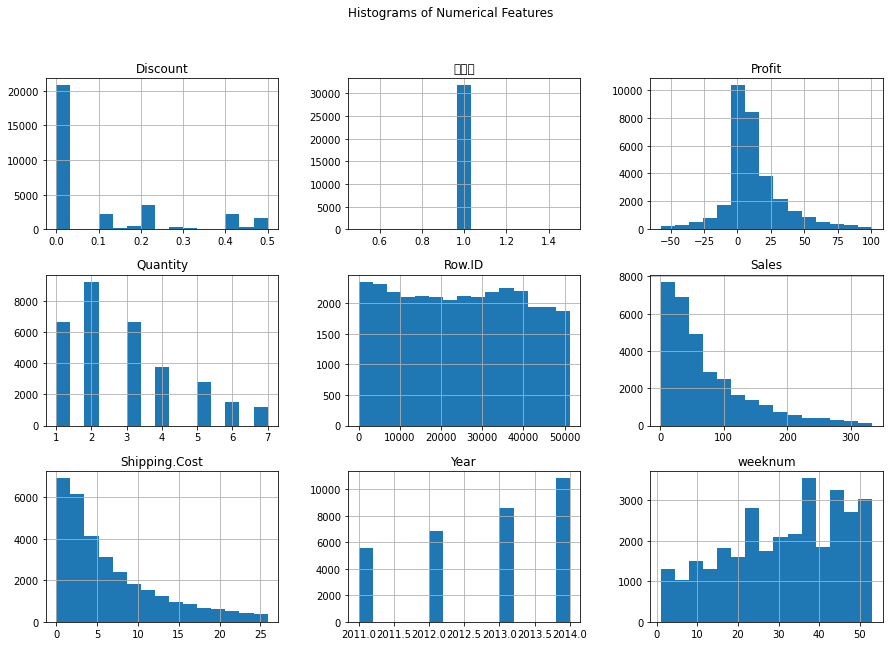

In [45]:
#Data Visualization
#a. Histograms for Numerical Columns
# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()


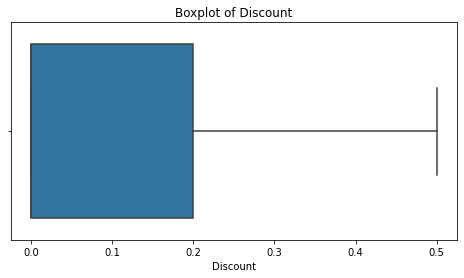

C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nayana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


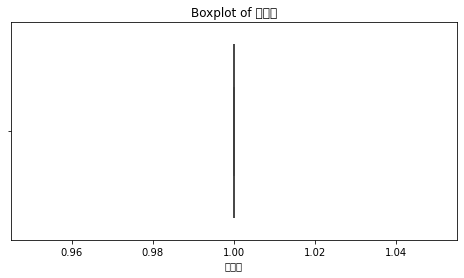

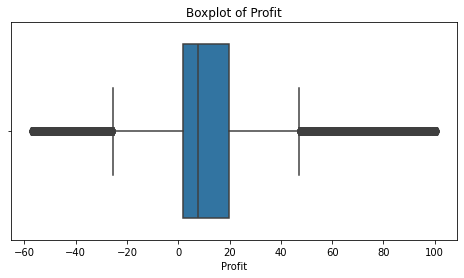

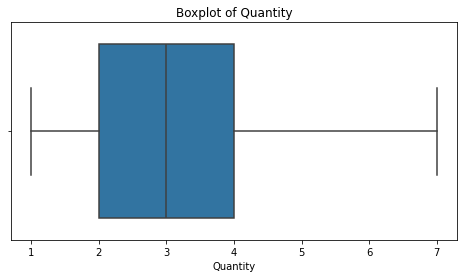

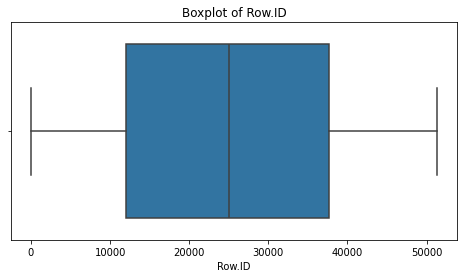

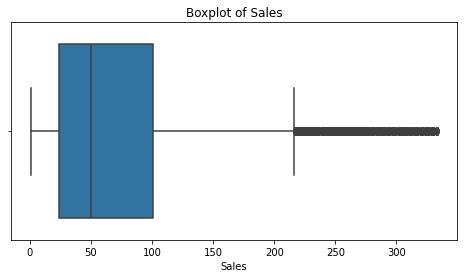

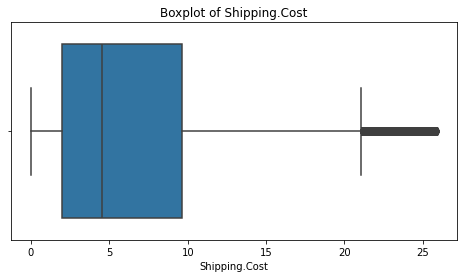

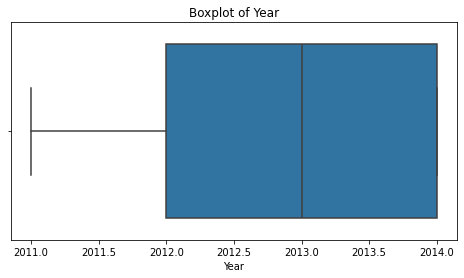

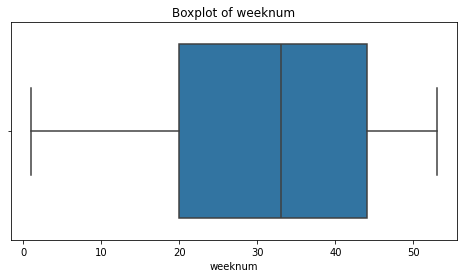

In [46]:
#b. Boxplots to Identify Outliers
# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


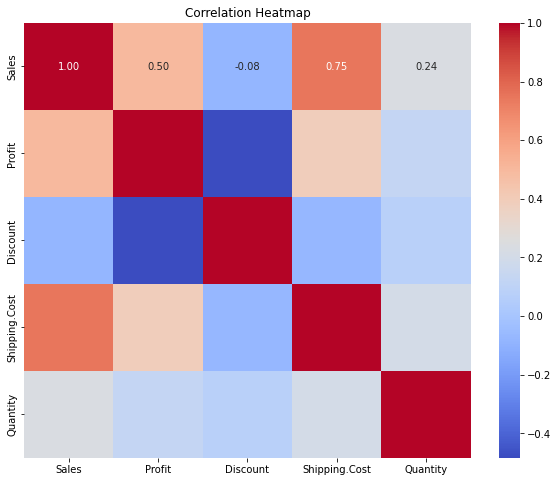

In [47]:
#c. Heatmap for Correlations
# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
